In [2]:
fig_dir = "../../figures"
fig_ext = "pdf"

In [3]:
#import astropy.units as u
import numpy as np
import astropy.units as u

import matplotlib.pyplot as plt
#plt.style.use("/home/daniel/thesis/thesis-style.mpl")

import thesis

In [4]:
import gwinc
import numpy as np

In [5]:
freq = np.logspace(1, 3, 1000)
ifo = gwinc.load_ifo('aLIGO')
ifo = gwinc.precompIFO(freq, ifo)
#noises = gwinc.noise_calc(freq, ifo)
#gwinc.plot_noise(ifo, noises)


In [6]:
freqs = np.logspace(0,5, 1000)

In [7]:
noises = gwinc.noise_calc(freqs, ifo)

In [8]:
strain_unit = u.hertz**-0.5

/home/daniel/.virtualenvs/IGRlaptop21/thesis/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/daniel/.virtualenvs/IGRlaptop21/thesis/lib/python2.7/site-packages/matplotlib/backends/backend_pdf.py:1120: UserWarning: 'SourceCodePro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
  warnings.warn(msg % os.path.basename(filename))


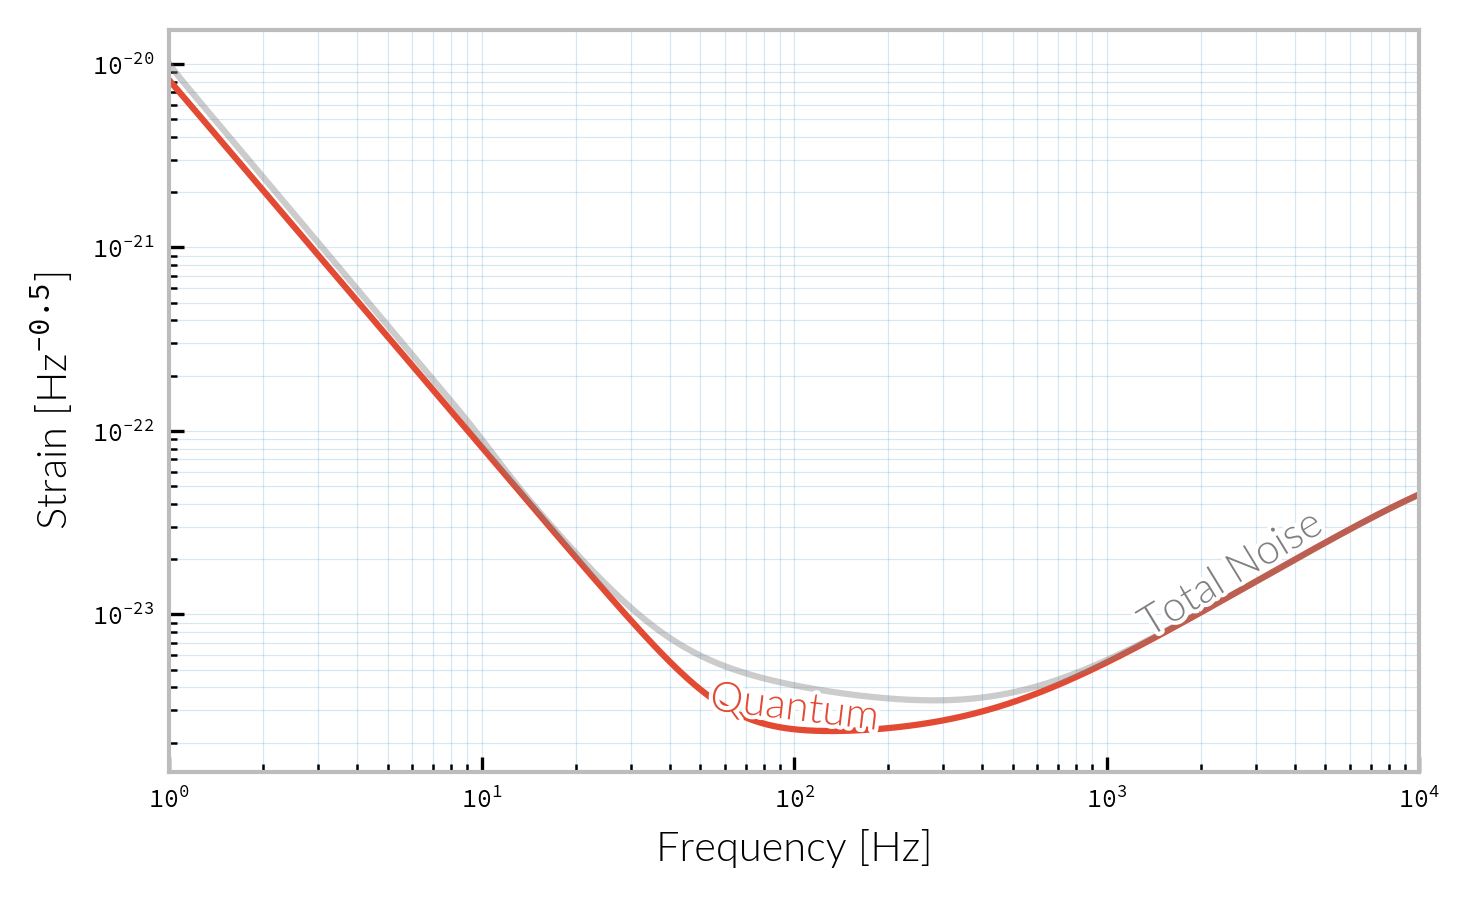

In [9]:
f, ax = plt.subplots(1,1, dpi=300)
qvacuum_line = ax.loglog(freqs*u.hertz, np.sqrt(noises['Quantum Vacuum']*strain_unit))
ax.set_xlim(0,1e4)

ax.set_ylabel("Strain [Hz$^{-0.5}$]")
ax.set_xlabel("Frequency [Hz]")

total_line = ax.loglog(freqs*u.hertz, np.sqrt(noises['Total'])*strain_unit, color='gray', alpha=0.4)
thesis.labelLine(total_line[0], x=2500, label="Total Noise", yshift=1.3)

thesis.labelLine(qvacuum_line[0], x=100, label="Quantum", yshift=1.3)

f = thesis.thesisify(f)

f.savefig("{}/intro/quantum-noise.{}".format(fig_dir, fig_ext))

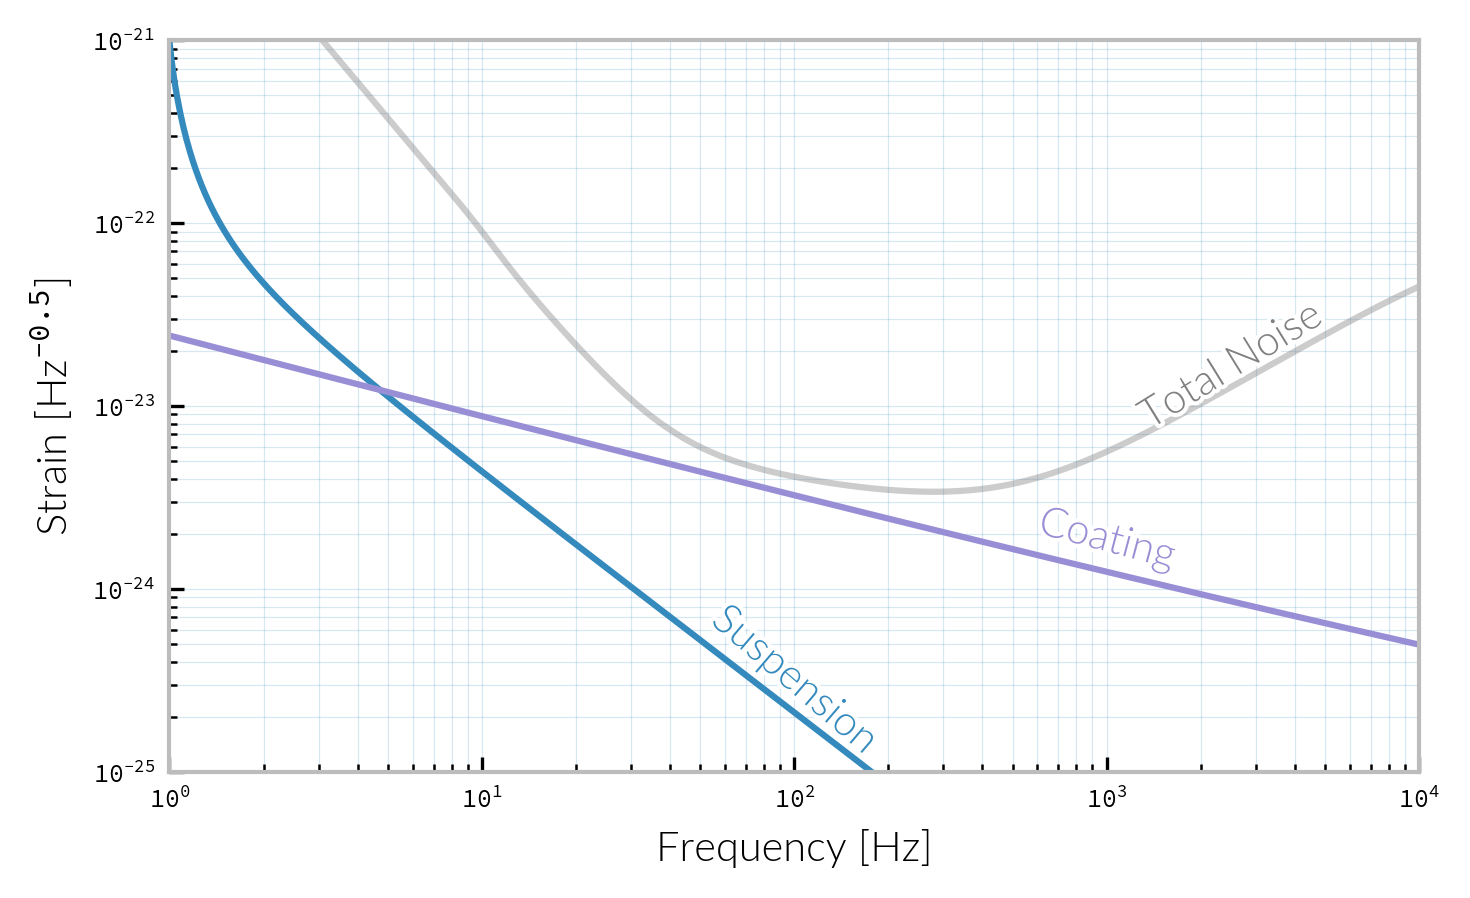

In [10]:
f, ax = plt.subplots(1,1, dpi=300)
sustherm_line = ax.loglog(freqs*u.hertz, np.sqrt(noises['Suspension Thermal']*strain_unit), color=thesis.colors['blue'])
coating_line = ax.loglog(freqs*u.hertz, np.sqrt(noises['Coating Brownian']*strain_unit), color=thesis.colors['purple'])
ax.set_xlim(0,1e4)
ax.set_ylim([1e-25, 1e-21])
ax.set_ylabel("Strain [Hz$^{-0.5}$]")
ax.set_xlabel("Frequency [Hz]")

total_line = ax.loglog(freqs*u.hertz, np.sqrt(noises['Total'])*strain_unit, color='gray', alpha=0.4)
thesis.labelLine(total_line[0], x=2500, label="Total Noise", yshift=1.3)

thesis.labelLine(sustherm_line[0], x=100, label="Suspension", yshift=1.5)
thesis.labelLine(coating_line[0], x=1000, label="Coating", yshift=1.5)
f = thesis.thesisify(f)

f.savefig("{}/intro/thermal-noise.{}".format(fig_dir, fig_ext))

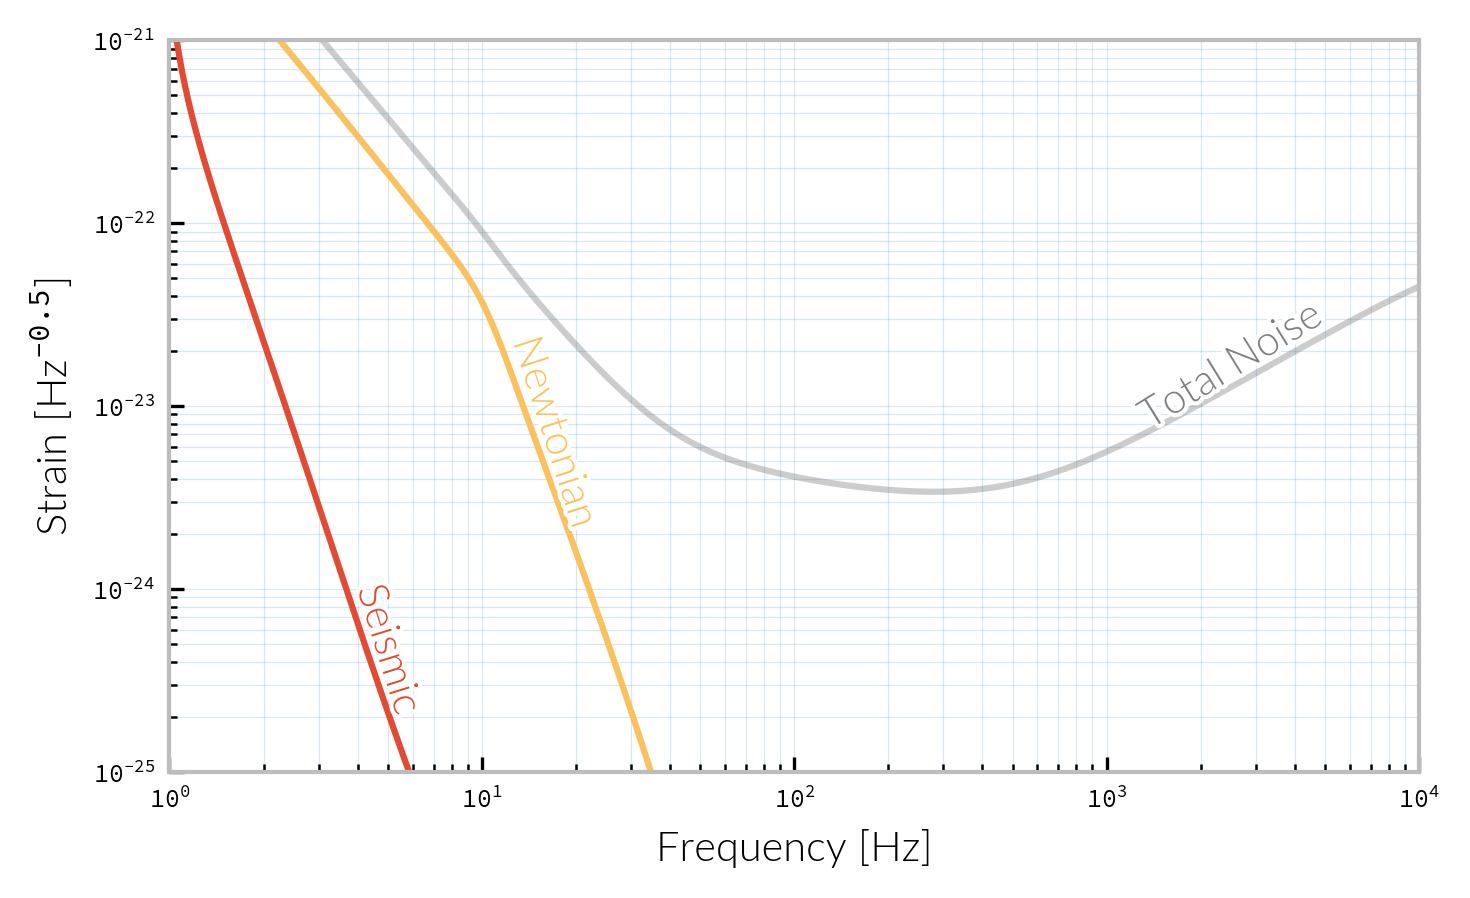

In [16]:
f, ax = plt.subplots(1,1, dpi=300)
sustherm_line = ax.loglog(freqs*u.hertz, np.sqrt(noises['Newtonian Gravity']*strain_unit), color=thesis.colors['yellow'])
coating_line = ax.loglog(freqs*u.hertz, np.sqrt(noises['Seismic']*strain_unit), color=thesis.colors['red'])
ax.set_xlim(0,1e4)
ax.set_ylim([1e-25, 1e-21])
ax.set_ylabel("Strain [Hz$^{-0.5}$]")
ax.set_xlabel("Frequency [Hz]")

total_line = ax.loglog(freqs*u.hertz, np.sqrt(noises['Total'])*strain_unit, color='gray', alpha=0.4)
thesis.labelLine(total_line[0], x=2500, label="Total Noise", yshift=1.3)

thesis.labelLine(sustherm_line[0], x=17, label="Newtonian", yshift=2.1)
thesis.labelLine(coating_line[0], x=5, label="Seismic", yshift=2.2)
f = thesis.thesisify(f)

f.savefig("{}/intro/gravity-noise.{}".format(fig_dir, fig_ext))